<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [22]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


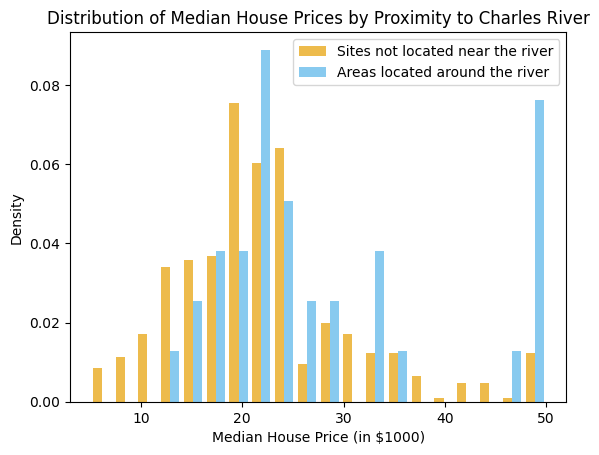

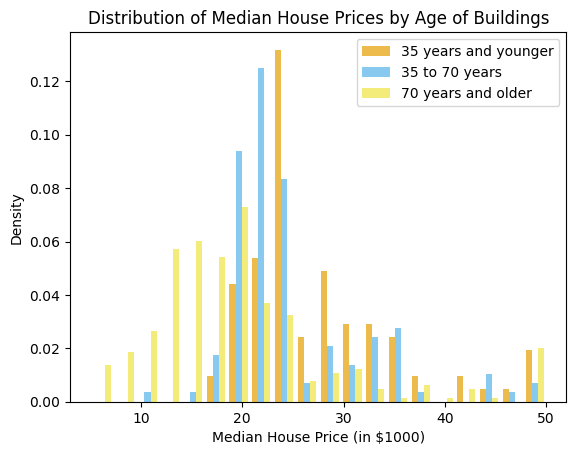

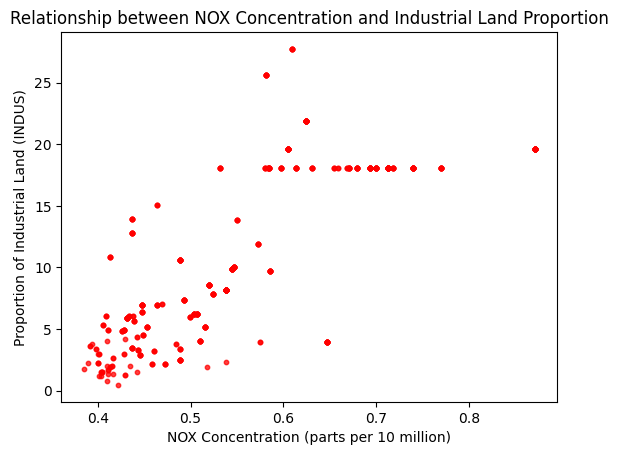

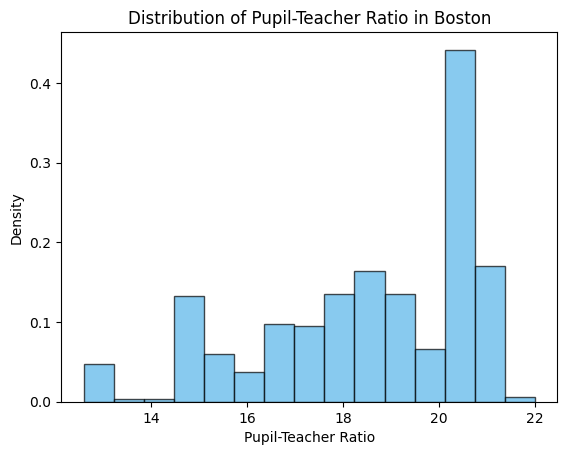

Существует ли значительная разница в медианной стоимости домов, ограниченных рекой Чарльз? (Т-тест для независимых выборок)
H0: Не существует разницы в медианной стоимости домов возле реки и домов, находящихся дальше от неё
H1: Существует разница в медианной стоимости домов возле реки и домов, находящихся дальше от неё
T-статистика: -3.1133, p-значение: 0.0036
Отвергаем H0: существует значимая разница в медианной стоимости домов у реки и вне её.
Существует ли разница в медианной стоимости домов (MEDV) для каждой доли занимаемых владельцами единиц, построенных до 1940 года (AGE)? (ANOVA)
H0: Нет разницы в медианной стоимости домов между группами.
Н1: Есть хотя бы одна группа, где медианная стоимость отличается.
F-статистика: 36.4076, p-значение: 0.0000
Отвергаем H0: Есть хотя бы одна группа, где медианная стоимость отличается.
Можно ли сделать вывод об отсутствии взаимосвязи между концентрацией оксида азота и долей акров земли, занятых неторговыми предприятиями, на город? (Корреляция Пи

In [46]:
boston_df.head()
# boston_df.isnull().sum()
# boston_df.info()
x1 = list(boston_df[boston_df["CHAS"] == 0.0]["MEDV"])
x2 = list(boston_df[boston_df["CHAS"] == 1.0]["MEDV"])
colors = ['#E69F00', '#56B4E9']
names = ['Sites not located near the river','Areas located around the river']
plt.hist([x1, x2], bins=20, density=True, color=colors, alpha=0.7, label=names)

plt.xlabel("Median House Price (in $1000)")
plt.ylabel("Density")
plt.title("Distribution of Median House Prices by Proximity to Charles River")
plt.legend()
plt.show()

age1 = list(boston_df[boston_df["AGE"] <= 35]["MEDV"])
age2 = list(boston_df[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70)]["MEDV"])
age3 = list(boston_df[boston_df["AGE"] >= 70]["MEDV"])
colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ["35 years and younger", "35 to 70 years", "70 years and older"]
plt.hist([age1,age2,age3], bins = 20, density = True, color = colors, alpha = 0.7, label = names)

plt.xlabel("Median House Price (in $1000)")
plt.ylabel("Density")
plt.title("Distribution of Median House Prices by Age of Buildings")
plt.legend()
plt.show()

nox = list(boston_df["NOX"])
indus = list(boston_df["INDUS"])

plt.scatter(nox, indus, s=10, color="red", alpha=0.75)

plt.xlabel("NOX Concentration (parts per 10 million)")
plt.ylabel("Proportion of Industrial Land (INDUS)")
plt.title("Relationship between NOX Concentration and Industrial Land Proportion")

plt.show()

ptratio = list(boston_df["PTRATIO"])

plt.hist(ptratio, bins=15, density=True, color="#56B4E9", alpha=0.7, edgecolor="black")

plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Density")
plt.title("Distribution of Pupil-Teacher Ratio in Boston")

plt.show()
q ='Существует ли значительная разница в медианной стоимости домов, ограниченных рекой Чарльз? (Т-тест для независимых выборок)'
# α = 0.05
h0 = 'H0: Не существует разницы в медианной стоимости домов возле реки и домов, находящихся дальше от неё'
h1 = "H1: Существует разница в медианной стоимости домов возле реки и домов, находящихся дальше от неё"
print(f"{q}\n{h0}\n{h1}")
stat, p_value = scipy.stats.ttest_ind(x1, x2, equal_var=False)

print(f"T-статистика: {stat:.4f}, p-значение: {p_value:.4f}")
if p_value < 0.05:
    print("Отвергаем H0: существует значимая разница в медианной стоимости домов у реки и вне её.")
else:
    print("Не отвергаем H0: значимой разницы в медианной стоимости домов нет.")

q = "Существует ли разница в медианной стоимости домов (MEDV) для каждой доли занимаемых владельцами единиц, построенных до 1940 года (AGE)? (ANOVA)"
h0 = "H0: Нет разницы в медианной стоимости домов между группами."
h1 = "Н1: Есть хотя бы одна группа, где медианная стоимость отличается."
print(f"{q}\n{h0}\n{h1}")
f_statistic, p_value = scipy.stats.f_oneway(age1,age2,age3)
print(f"F-статистика: {f_statistic:.4f}, p-значение: {p_value:.4f}")
if p_value < 0.05:
    print("Отвергаем H0: Есть хотя бы одна группа, где медианная стоимость отличается.")
else:
    print("Не отвергаем H0: значимой в медианной стоимости домов между группами нет.")

q = "Можно ли сделать вывод об отсутствии взаимосвязи между концентрацией оксида азота и долей акров земли, занятых неторговыми предприятиями, на город? (Корреляция Пирсона)"
h0 = "H0: Нет взаимосвязи между концентрацией оксида азота и долей акров земли."
h1 = "H1: Есть взаимосвязь между концентрацией оксида азота и долей акров земли."
print(f"{q}\n{h0}\n{h1}")

pearson, p_value = scipy.stats.pearsonr(nox,indus)
print(f"Pearson: {pearson:.4f}, p-значение: {p_value:.4f}")
if p_value < 0.05:
    print("Отвергаем H0: Есть взаимосвязь между концентрацией оксида азота и долей акров земли.")
else:
    print("Не отвергаем H0: Нет взаимосвязи между концентрацией оксида азота и долей акров земли.")
q = "Каково влияние дополнительного взвешенного расстояния до пяти центров занятости Бостона на медианную стоимость домов, занимаемых владельцами? (Регрессионный анализ)"
h0 = "H0: Взвешенное расстояние до центров занятости (DIS) не влияет на медианную стоимость домов (MEDV)."
h1 = "H1: Взвешенное расстояние до центров занятости (DIS) оказывает влияние на медианную стоимость домов (MEDV)."
print(f"{q}\n{h0}\n{h1}")

X = boston_df["DIS"] 
X = sm.add_constant(X)  
Y = boston_df["MEDV"]  

model = sm.OLS(Y, X).fit()
results = model.summary()
p_value_dis = model.pvalues["DIS"]
coef_dis = model.params["DIS"]

print(results)
print(f"P-value для коэффициента DIS: {p_value_dis:.4f}")
print(f"Коэффициент DIS: {coef_dis:.4f}")
if p_value < 0.05:
    print("Отвергаем H0: Взвешенное расстояние до центров занятости (DIS) оказывает влияние на медианную стоимость домов (MEDV).")
else:
    print("Не отвергаем H0: Взвешенное расстояние до центров занятости (DIS) не влияет на медианную стоимость домов (MEDV).")


In [28]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
